# Automated Data Retreival

The semi-automatic retrieval of data is valuable for documenting and reconstructing work related to hydrology.  What follows is scripting by a colleague that can be used for future efforts.

:::{note}
I have modified his original work to render on my web server - main changes are to suppress interactive behavior, and to split the code up a bit.  Otherwise it is Moise's original Thesis work unchanged!
:::

## A Hydrological Data Analysis and Visualization Toolkit

- *Author*: Moise Baraka, Ph.D. Student in CECE Water Resources, Texas Tech University
- *Date*: 02/21/2024
- *Supervised by* Theodore Cleveland, Ph.D. CECE Water Resources, Associate Professor, Texas Tech University
- *class of* spring 2024 in Surface Water Hydrology

- Description:
*This toolkit provides a collection of functions for retrieving, processing, analyzing, and visualizing hydrological data from the USGS web server. It includes modules for retrieving rating curve data, fitting it, computing statistical measures, generating histograms, and plotting various hydrological data attributes. The program allows users to input station codes to retrieve specific data and provides visualizations for any station monitored by the USGS program.*
---

### STREAMFLOW DATA RETRIEVAL

- **Step 1: Input Collection**

The script prompts the user to input the USGS station ID, start date, and end date.

- **Step 2: Directory Selection**

The user is prompted to input the directory where the data will be saved. If no directory is provided, it defaults to a predefined directory, which must have been defined in the script.

- **Step 3: URL Construction**

The script constructs a URL using the provided station ID, start date, and end date. This URL is used to retrieve the data from the USGS website.

- **Step 4: Data Retrieval**

The script downloads the data from the constructed URL. During the download process, it displays a progress bar or percentage showing the download progress.

- **Step 5: Data Saving**

The downloaded data is saved to the specified directory with a filename indicating the station code and data type.

:::{note}
Here we load required modules
:::

In [9]:
import re
import urllib.request
import tqdm
import time
import os

:::{note}
Date parser function.  
:::

In [10]:
#------------------------------------------------------------------------
def get_date_input(prompt):
    while True:
        date_input = input(prompt)
        # Validate date format
        if re.match(r'^\d{4}-\d{2}-\d{2}$', date_input):
            return date_input
        else:
            print("Invalid date format. Please use yyyy-mm-dd format.")

:::{note}
Directory selector function
:::

In [11]:
#------------------------------------------------------------------------
def get_save_directory_input(default_directory):
    while True:
        save_directory = input(f"Enter the directory to save the data (press Enter to use default directory {default_directory}): ")
        if not save_directory:
            return default_directory
        # Validate directory exists
        elif os.path.isdir(save_directory):
            return save_directory
        else:
            print("Directory does not exist. Please enter a valid directory.")

:::{note}
Here we build the URL to generate the request to USGS server(s)
:::

In [12]:
#------------------------------------------------------------------------
def build_url1(station_code, start_date, end_date):
    base_url = 'https://nwis.waterdata.usgs.gov/nwis/dv?referred_module=sw&search_site_no='
    query_params = '&search_site_no_match_type=exact&site_tp_cd=OC&site_tp_cd=OC-CO&site_tp_cd=ES&site_tp_cd=' \
                   'LK&site_tp_cd=ST&site_tp_cd=ST-CA&site_tp_cd=ST-DCH&site_tp_cd=ST-TS&index_pmcode_00060=1' \
                   '&group_key=NONE&sitefile_output_format=html_table&column_name=agency_cd&column_name=site_no' \
                   '&column_name=station_nm&range_selection=date_range&begin_date=' + start_date + '&end_date=' + end_date + \
                   '&format=rdb&date_format=YYYY-MM-DD&rdb_compression=value&list_of_search_criteria=search_site_no%2Csite_tp_cd%2Crealtime_parameter_selection'

    return base_url + station_code + query_params

:::{note}
Now the retreival step.  Some output is suppressed for JupyterBook
:::

In [13]:
#------------------------------------------------------------------------
# Retrieve and save data from a URL, and return the filename
def retrieve_and_save_data(url, filename):
    print("\nDownloading data from:", url , '\n')
    response = urllib.request.urlopen(url)
    total_size = int(response.headers.get('content-length', 0))
    downloaded = 0
    chunk_size = 1024
    start_time = time.time()  # Record start time
    with open(filename, 'wb') as file:
        while True:
            chunk = response.read(chunk_size)
            if not chunk:
                break
            file.write(chunk)
            downloaded += len(chunk)
            if total_size > 0:
                progress = downloaded / total_size * 100
            else:
                # Assume 1.2 seconds download time if total_size is zero
                elapsed_time = time.time() - start_time
                progress = min(100, elapsed_time / 1.2 * 100)
#            print(f"Estimated downloading progress: {progress:.1f}%\r", end='') 
    print("\nData saved to:", filename)
    return filename

:::{note}
Here is the batch request (deactivate for interactive)
:::

In [14]:
station_code = '07297910'
start_date = '1936-01-01'
end_date = '2024-02-01'
save_directory = './' # suppress and actiovate above for interactive

:::{note}
Here is the interactive part (activate for interactive)
:::

```
#--------------------------------------------------------------------------
#                          Define the inputs
#--------------------------------------------------------------------------
print(" ------------------------------------------",
        "\n Please provide the following information:",
        "\n ------------------------------------------")


# activate code below and suppress above 3 lines for interactive
#station_code = input('- USGS station ID: ')
#start_date = get_date_input('- Start Date (yyyy-mm-dd): ')
#end_date = get_date_input('- End Date (yyyy-mm-dd): ')



#--------- !!! Define the directory where the data will be saved !!! -----------
default_directory = r"C:\Users\mbaraka\OneDrive - Texas Tech University\Thesis file"  # To be defined!

save_directory = get_save_directory_input(default_directory)
```

:::{note}
Here get the file from the remote
:::

In [15]:
#--------------------------------------------------------------------------
#        Define the base URLs for data retrieval from Website 1
#--------------------------------------------------------------------------
url1 = build_url1(station_code, start_date, end_date)

# Retrieve and save data from Website 1
filename1 = retrieve_and_save_data(url1, os.path.join(save_directory, f'USGS_Data_for_{station_code}.txt'))




Data saved to: ./USGS_Data_for_07297910.txt


## STATISTICS, HISTOGRAM AND FLOW DURATION CURVE

- **Data Processing:**

To begin with, the script processes text data saved previously, creating a DataFrame. It extracts relevant information such as agency code, site number, datetime, flow rate, and flag.

- **Statistical Analysis:**
  
The script performs statistical analysis on the flow rate data, calculating various metrics like median, mean, standard deviation, variance, minimum, maximum, quartiles, and interquartile range. It identifies and counts outliers based on the interquartile range method.

- **Plotting:**

The script plots two types of graphs:
 1. Flow Frequency Histogram with KDE (Kernel Density Estimation):

Plots the distribution of flow rates against frequency. Uses Kernel Density Estimation (KDE) for smooth estimation of the probability density function.

$$ P(x) = \frac{1}{n h} \sum_{i=1}^{n} K\left(\frac{x-x_i}{h}\right) $$

where $P(x)$ is the density estimate at point $x$, $n$ is the number of data points, $h$ is the bandwidth, $x_i$ are the data points, and $K$ is the kernel function.
    
 2. Flow Duration Curve (FDC) with Weibull formula and legend:

Plots the flow rate against the probability of exceedance or equality. Computes the cumulative probability using the Gringorten method, a generalized version of the Weibull formula, defined as follows:
$$ P(X \geq x) = \left(1 - \left(\frac{i-0.4}{n+0.2}\right)\right) \times 100 $$

where $P(X \geq x)$ is the cumulative probability of exceeding or equaling $x$, $i$ is the rank of the data point, and $n$ is the total number of data points.


*Note: Both plots are customized with appropriate labels, titles, gridlines, and legends.*

- **Outputs:**
  
The script generates CSV files containing processed data and statistical analysis results. It also saves PNG images of the flow frequency histogram and flow duration curve.

- **Libraries Used:**
  
    1. pandas: For data manipulation and analysis.
    2. numpy: For mathematical operations.
    3. matplotlib.pyplot: For plotting graphs.
    4. seaborn: For enhanced data visualization.
    5. io: For handling file I/O operations.

:::{note}
Load the modules (libraries)
:::

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

:::{note}
Function to process the download data and build a pandas dataframe.
:::

In [17]:
#------------------------------------------------------------------------
# Process data from a text file and return a cleaned DataFrame for Website 1
def process_website1_data(filename, station_code):
    data = []
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith("USGS"):
                parts = line.split("\t")
                agency_cd, site_no, datetime, flow_rate, flag = parts[:5]
                data.append([agency_cd, site_no, datetime, flow_rate, flag])

    df = pd.DataFrame(data, columns=['agency_cd', 'site_no', 'datetime', 'flow_rate', 'flag'])
    df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
    df['flow_rate'] = pd.to_numeric(df['flow_rate'], errors='coerce')
    df.set_index('datetime', inplace=True)
    
    # Filter and keep rows where 'flag' is not equal to "P"
    df = df[df['flag'] != 'P\n']
    
    df.dropna(subset=['flow_rate'], inplace=True)

    csv_filename1 = os.path.join(save_directory, f'{station_code}_flow_data.csv')
    df.to_csv(csv_filename1)
    
    return df

:::{note}
Function to analyze the pandas dataframe, report relevant statistics, and save the results to a CSV file
:::

In [18]:
#------------------------------------------------------------------------
def analyze_data(df):
    """
    Performs statistical analysis on the flow rate data and saves the results to a CSV file.

    Parameters:
    df (DataFrame): DataFrame containing flow rate data.
    """
    sample_size = len(df)
    median = df['flow_rate'].median()
    mean = df['flow_rate'].mean()
    std = df['flow_rate'].std()
    variance = df['flow_rate'].var()
    minimum = df['flow_rate'].min()
    maximum = df['flow_rate'].max()
    first_quartile = df['flow_rate'].quantile(0.25)
    third_quartile = df['flow_rate'].quantile(0.75)
    interquartile_range = third_quartile - first_quartile
    
    # Calculate number of outliers
    outliers = df[(df['flow_rate'] < first_quartile - 1.5 * interquartile_range) | (df['flow_rate'] > third_quartile + 1.5 * interquartile_range)]
    num_outliers = len(outliers)

    # Display statistics
    print("--------- Statistics: ----------\n")
    print(f"-  Sample Size: {sample_size}")
    print(f"-  Median: {median:.2f}")
    print(f"-  Mean: {mean:.2f}")
    print(f"-  Standard Deviation: {std:.2f}")
    print(f"-  Variance: {variance:.2f}")
    print(f"-  Minimum: {minimum:.2f}")
    print(f"-  Maximum: {maximum:.2f}")
    print(f"-  First Quartile: {first_quartile:.2f}")
    print(f"-  Third Quartile: {third_quartile:.2f}")
    print(f"-  Interquartile Range: {interquartile_range:.2f}")
    print(f"-  Number of Outliers: {num_outliers}")
    print()
    
    # Create DataFrame for statistics
    statistics_df = pd.DataFrame({
        'Statistic': ['Sample Size', 'Median', 'Mean', 'Standard Deviation', 'Variance', 'Minimum', 'Maximum', 'First Quartile', 'Third Quartile', 'Interquartile Range', 'Number of Outliers'],
        'Value': [sample_size, median, mean, std, variance, minimum, maximum, first_quartile, third_quartile, interquartile_range, num_outliers]
    })

    # Save statistics to CSV file
    statistics_filename = os.path.join(save_directory, f'{station_code}_statistics.csv')
    statistics_df.to_csv(statistics_filename, index=False)

:::{note}
Function to plot a flow frequency diagram from the dataframe.
:::

In [19]:
#------------------------------------------------------------------------
def plot_flow_frequency_histogram(df):
    """
    Plots the flow frequency histogram with a fitted KDE based on the flow rates in the DataFrame.

    Parameters:
    df (DataFrame): DataFrame containing flow rate data.
    """
    plt.figure(figsize=(9, 6))
    ax = sns.histplot(df['flow_rate'], bins=80, kde=True, edgecolor='black')
    kde_color = 'red'
    kde_alpha = 0.5
    ax.get_lines()[0].set_color(kde_color)
    ax.get_lines()[0].set_alpha(kde_alpha)
    ax.set_title('Flow Frequency Histogram', fontsize=16)
    ax.set_xlabel('Flow Rate (cfs)', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()  # Ensure tight layout to prevent cropping of labels
    plt.savefig(os.path.join(save_directory, f'{station_code}_flow_frequency_histogram.png'))
    plt.show()

:::{note}
Function to plot a flow duration curve from the dataframe.
:::

In [20]:
#------------------------------------------------------------------------
def plot_flow_duration_curve(df):
    """
    Plots the flow duration curve (FDC).

    Parameters:
    df (DataFrame): DataFrame containing flow rate data.
    """
    # Sort the flow rates in descending order
    df_sorted = df.sort_values('flow_rate', ascending=False)

    # Compute the cumulative probability
    # The generalized form proposed by Gringorten (1963) a = 0.4
    df_sorted['cumulative_probability'] = ((np.arange(len(df_sorted))+0.6) / (len(df_sorted)+1.2)) * 100

    # Plot the flow duration curve
    fig, ax = plt.subplots(figsize=(9, 6))
    ax.semilogy(df_sorted['cumulative_probability'], df_sorted['flow_rate'])
    ax.set_title('Flow Duration Curve', fontsize=18)
    ax.set_xlabel('Probability of exceedance or equality (\%)', fontsize=16)
    ax.set_ylabel('Flow Rate ($ft^3/s$)', fontsize=16)
    ax.grid(which='both')

    # Add legend with the Weibull formula
    equation = r'$P(X \geq x) = \left(1 - \left(\frac{i-0.4}{n+0.2}\right)\right) \times 100$'
    #ax.legend(['Flow Duration Curve', f'Weibull Fit: {equation}'], bbox_to_anchor=(0.35, .95), loc='upper left', fontsize=16)

    # Add text box with the Weibull formula
    ax.text(0.25, 0.8, f'Weilbull formula: {equation}', transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=dict(facecolor='white', alpha=1))

    plt.tight_layout()  # Ensure tight layout to prevent cropping of labels
    
    plt.savefig(os.path.join(save_directory, f'{station_code}_fdc.png'))
    plt.show()

:::{note}
Pocess the download data, build a pandas dataframe; then plot the flood frequency histogram, report summary statistics, and plot the flow duration curve.
:::

Data from Website 1:
           agency_cd   site_no  flow_rate flag
datetime                                      
1967-10-01      USGS  07297910        0.1    A
1967-10-02      USGS  07297910        0.1    A
1967-10-03      USGS  07297910        0.1    A
1967-10-04      USGS  07297910        0.1    A
1967-10-05      USGS  07297910        0.1    A


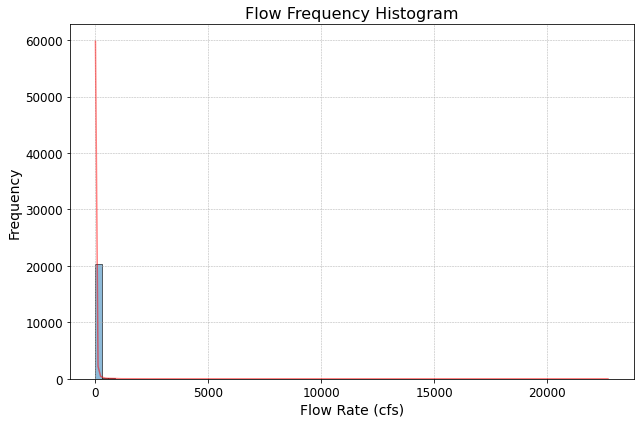

--------- Statistics: ----------

-  Sample Size: 20578
-  Median: 3.80
-  Mean: 26.72
-  Standard Deviation: 257.99
-  Variance: 66560.94
-  Minimum: 0.00
-  Maximum: 22700.00
-  First Quartile: 0.80
-  Third Quartile: 11.00
-  Interquartile Range: 10.20
-  Number of Outliers: 2038



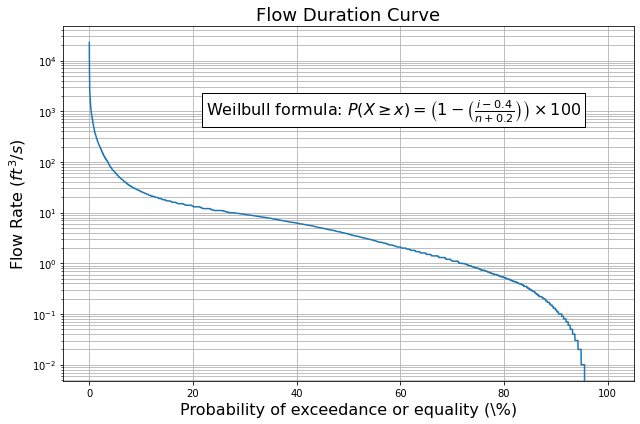

In [21]:
#--------------------------------------------------------------------------
#      Preprocess the Retrieved Data and Display the Head Part of it 
#--------------------------------------------------------------------------
df1 = process_website1_data(filename1, station_code)

# Display the first few rows of data from Website 1
print("Data from Website 1:")
print(df1.head())

#--------------------------------------------------------------------------
#                                 Plotting 
#--------------------------------------------------------------------------
# Plot the flow frequency histogram with a fitted KDE
plot_flow_frequency_histogram(df1)

# Statistical analysis
analyze_data(df1)

# Flow duration curve
plot_flow_duration_curve(df1)